
# 🧪 Task 2: Exploratory Data Analysis on Titanic Dataset

This Jupyter Notebook performs an Exploratory Data Analysis (EDA) on the Titanic dataset, famously used for binary classification (survived vs. not survived). The notebook follows the following structure:

### 📌 Objectives:
- Load and preview the Titanic dataset
- Handle missing values and clean the data
- Explore data types and statistical summaries
- Analyze survival rates by gender, class, and other features
- Visualize patterns using bar plots and heatmaps

### 📁 Dataset:
I use the `train.csv` file from the Kaggle Titanic dataset: **Titanic: Machine Learning from Disaster**.

---

## 🛠️ Tools & Libraries:
- **Python**
- **Pandas**
- **Seaborn**
- **Matplotlib**

---

## 🔍 Covered Topics:
- Data types and missing values
- Descriptive statistics and grouping
- Data visualization (bar plots, histograms, heatmaps)
- Group-based insights (e.g., survival by gender and class)

---




In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
# Fix missing values using assignment
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' due to too many missing values
df = df.drop(columns=['Cabin'])

In [33]:
# Convert relevant columns to categorical type
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')

In [35]:
df.groupby('Sex')['Survived'].mean()
df.groupby('Pclass')['Survived'].mean()
pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize='index')

Survived              0         1
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

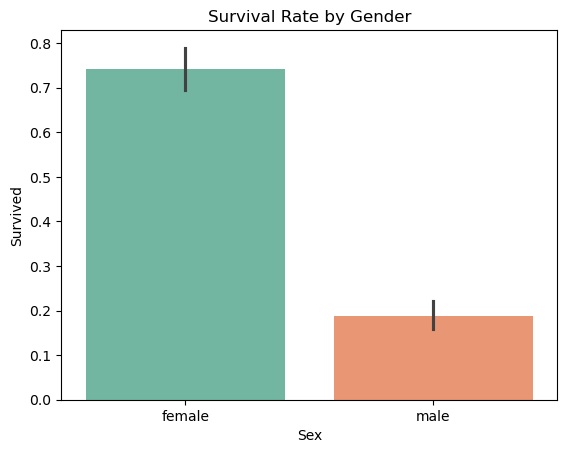

In [53]:
sns.barplot(x='Sex', y='Survived', data=df,palette='Set2')
plt.title('Survival Rate by Gender')
plt.show()

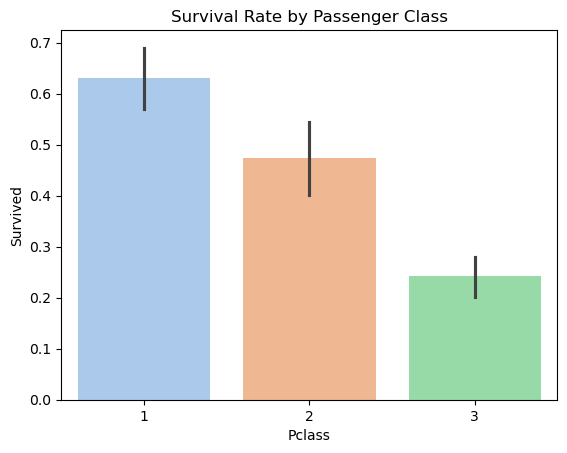

In [51]:
sns.barplot(x='Pclass', y='Survived', data=df,palette='pastel')
plt.title('Survival Rate by Passenger Class')
plt.show()

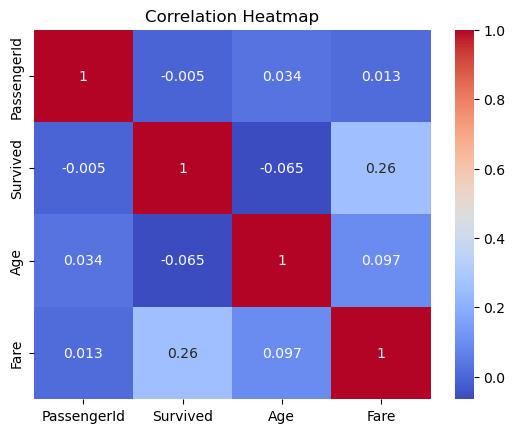

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

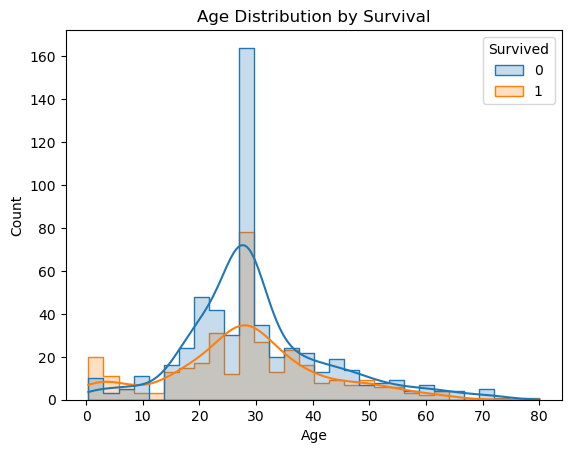

In [43]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element="step")
plt.title('Age Distribution by Survival')
plt.show()

## 🎁 Bonus:
Visualizations of survival rates across combinations of features.

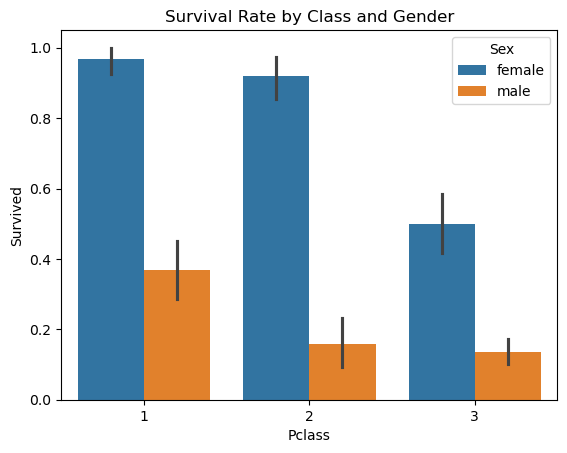

In [45]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.show()

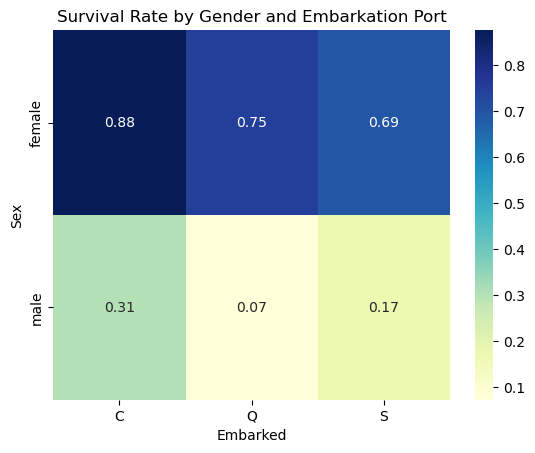

In [47]:
pivot_table = df.pivot_table(values='Survived', index='Sex', columns='Embarked')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Survival Rate by Gender and Embarkation Port')
plt.show()